# Biodiversity Intactness Index Changes in Phoenix, AZ, USA (2017-2020).

Author: Sofia Ingersoll

## Objective

Our goal with this project is to access the variations in biodiversity in Phoenix, Arizona between 2017 and 2020 to determine the affects of urban development. The metropolitan area of Phoenix, more specifically, Maricopa County, was dubbed the most developed land since 2001, in 2021 [1]. As the sprawl of the urban landscape continues to grow, new pressures are introduced to natural areas, creating stress on local biodiversity. Moinitoring the changes that evolve as a result of these changes is important for understanding anthropogenic activity impacts the natural environment. The assessments made using BII data may be applied strategically to spatial planning and management of remaining habitats.

### Method Highlights

- Accessing MPC STAC catalog collection for a specific bounding box
- Creating a map to demonstrate Phoenix subdivision 
- Calculating `pct_area` within Phoenix subdivision for 2017 & 2020
- Visualizing devestated BII areas (>= 75% lost) between 2017 and 2020

## About the Data

Two data sources are utilized in this document:

1. Microsoft Planetary Computer (MPC): Biodiversity Intactness

`io-biodiversity`

[https://planetarycomputer.microsoft.com/dataset/io-biodiversity]
 

2. TIGER Shapefiles Census County Subdivision shapefile for Arizona, specifically the Phoenix subdivision polygon.
[https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=County+Subdivisions] 

## Final Outputs

Publication Date: 13 December 2023.

Citations:

```python
1 <- "https://www.washingtonpost.com/nation/interactive/2021/land-development-urban-growth-maps/"
```

### Import Libraries

In [2]:
# loading libraries and functions
import pandas as pd
import numpy as np
import geopandas as gpd
import rioxarray as rioxr
import contextily
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches       
import os 

from shapely.geometry import Polygon

from pystac_client import Client            # to access MPC STAC catalogs

import planetary_computer                   # access items from the MPC STAC catalog

from IPython.display import Image           # pretty display

### Access MCP STAC `io-biodiversity`

We will access the catalog and collection of interest for our region (bbox) and temporal range of interest (2017:2020). These STAC collections will be stored as an as a search `items`

In [7]:
# access catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# access the io-biodiversity collection
io_biodiversity_collection = catalog.get_child('io-biodiversity')
io_biodiversity_collection

# temporal range of interest
temporal_roi = "2017-01-01/2020-01-01"

# spatial region of interest
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

search = catalog.search(collections=['io-biodiversity'],
                        bbox = bbox,
                        datetime = temporal_roi)
items = search.item_collection()
len(items)

# look at items, are they what we expect?
items

#### Selecting an Item from the `ItemCollection`

In [9]:
# subsetting for BII 2017 data 
BII_2017 = items[3]

# subsetting for BII 2020 data 
BII_2020 = items[0]

In [12]:
# hey assets, where is data stored?
for key in BII_2017.assets.keys():
    print(key, '--', BII_2017.assets[key].title)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


##### Inspecting the properties of the item just read in
Below, we learn that the projection is EPSG:4326

In [13]:
# print item id and properties for BII 2017 
print('id:' , BII_2017.id)

BII_2017.properties

id: bii_2017_34.74464974521749_-115.38597824385106_cog


{'datetime': None,
 'proj:epsg': 4326,
 'proj:shape': [7992, 7992],
 'end_datetime': '2017-12-31T23:59:59Z',
 'proj:transform': [0.0008983152841195215,
  0.0,
  -115.38597824385106,
  0.0,
  -0.0008983152841195215,
  34.74464974521749,
  0.0,
  0.0,
  1.0],
 'start_datetime': '2017-01-01T00:00:00Z'}

In [15]:
# load BII 2017 & 2020 data
BII_2017_data = rioxr.open_rasterio(BII_2017.assets['data'].href)

BII_2020_data = rioxr.open_rasterio(BII_2020.assets['data'].href)

#### Inspecting the MPC STAC Data

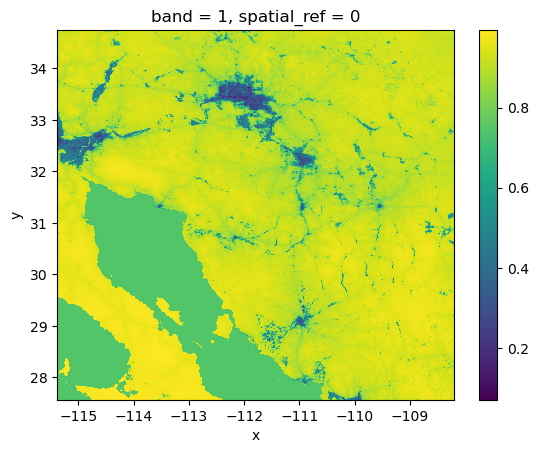

In [16]:
# quick visualization
BII_2017_data.plot()

### Load Shapefile

<Axes: >

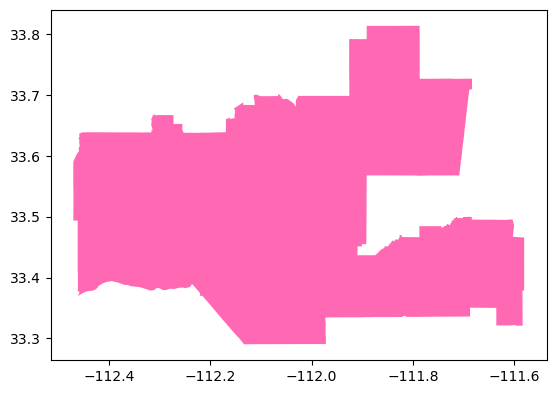

In [8]:
# reading in .shp data using geopandas
arizona = gpd.read_file(os.path.join(os.getcwd(), 'tl_2022_04_cousub.shp'))

# create a subset of Phoenix, AZ
phoenix_polygon = arizona[arizona.NAME == 'Phoenix']

# confirm the polygon contains Phoenix, AZ subdivision
phoenix_polygon.plot(color = 'hotpink')